In [4]:
%matplotlib inline
import numpy as np
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage.morphology import distance_transform_edt
import torch

def generate_random_circles(n = 100, d = 256):
    circles = np.random.randint(0, d, (n, 3))
    x = np.zeros((d, d), dtype=int)
    f = lambda x, y: ((x - x0)**2 + (y - y0)**2) <= (r/d*10)**2
    for x0, y0, r in circles:
        x += np.fromfunction(f, x.shape)
    x = np.clip(x, 0, 1)

    return x

/home/syedhr264/anaconda3/envs/pDL/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


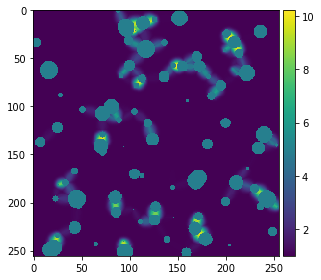

In [1]:
def unet_weight_map(y, wc=None, w0 = 10, sigma = 5):

    """
    Generate weight maps as specified in the U-Net paper
    for boolean mask.

    "U-Net: Convolutional Networks for Biomedical Image Segmentation"
    https://arxiv.org/pdf/1505.04597.pdf

    Parameters
    ----------
    mask: Numpy array
        2D array of shape (image_height, image_width) representing binary mask
        of objects.
    wc: dict
        Dictionary of weight classes.
    w0: int
        Border weight parameter.
    sigma: int
        Border width parameter.

    Returns
    -------
    Numpy array
        Training weights. A 2D array of shape (image_height, image_width).
    """

    labels = label(y)
    no_labels = labels == 0
    label_ids = sorted(np.unique(labels))[1:]

    if len(label_ids) > 1:
        distances = np.zeros((y.shape[0], y.shape[1], len(label_ids)))

        for i, label_id in enumerate(label_ids):
            distances[:,:,i] = distance_transform_edt(labels != label_id)

        distances = np.sort(distances, axis=2)
        d1 = distances[:,:,0]
        d2 = distances[:,:,1]
        w = w0 * np.exp(-1/2*((d1 + d2) / sigma)**2) * no_labels
    else:
        w = np.zeros_like(y)
    if wc:
        class_weights = np.zeros_like(y)
        for k, v in wc.items():
            class_weights[y == k] = v
        w = w + class_weights
    return w


def unet_weight_map_torch(y, wc=None, w0 = 10, sigma = 5):

    """
    Generate weight maps as specified in the U-Net paper
    for boolean mask.

    "U-Net: Convolutional Networks for Biomedical Image Segmentation"
    https://arxiv.org/pdf/1505.04597.pdf

    Parameters
    ----------
    mask: Numpy array
        2D array of shape (image_height, image_width) representing binary mask
        of objects.
    wc: dict
        Dictionary of weight classes.
    w0: int
        Border weight parameter.
    sigma: int
        Border width parameter.

    Returns
    -------
    Numpy array
        Training weights. A 2D array of shape (image_height, image_width).
    """

    labels = label(y)
    no_labels = labels == 0
    label_ids = sorted(np.unique(labels))[1:]

    if len(label_ids) > 1:
        distances = np.zeros((y.shape[0], y.shape[1], len(label_ids)))

        for i, label_id in enumerate(label_ids):
            distances[:,:,i] = distance_transform_edt(labels != label_id)

        distances = np.sort(distances, axis=2)
        d1 = distances[:,:,0]
        d2 = distances[:,:,1]
        w = w0 * np.exp(-1/2*((d1 + d2) / sigma)**2) * no_labels
    else:
        w = np.zeros_like(y)
    if wc:
        class_weights = np.zeros_like(y)
        for k, v in wc.items():
            class_weights[y == k] = v
        w = w + class_weights
    return w

y = generate_random_circles()

wc = {
    0: 1, # background
    1: 5  # objects
}

w = unet_weight_map(y, wc)

imshow(w)

/home/syedhr264/anaconda3/envs/pDL/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


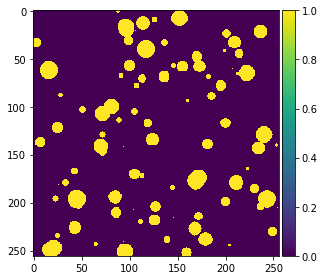

In [2]:
imshow(y)

In [5]:
y = torch.Tensor(generate_random_circles())

In [13]:
unet_weight_map(y)

array([[5.38761604e-24, 7.23516102e-23, 6.84113071e-22, ...,
        5.02849169e-23, 1.45729782e-24, 3.62853317e-26],
       [1.12678780e-22, 1.75713979e-21, 1.95878436e-20, ...,
        3.06319086e-22, 8.96007030e-24, 2.25074471e-25],
       [2.60414552e-21, 3.01709563e-20, 4.16868213e-19, ...,
        1.59463559e-21, 4.71084283e-23, 1.19443123e-24],
       ...,
       [3.13255431e-69, 2.01699773e-68, 1.10709035e-67, ...,
        2.47852712e-11, 4.54711570e-12, 8.89227888e-13],
       [2.99137808e-72, 1.92531115e-71, 1.05630248e-70, ...,
        1.98436339e-12, 4.01436081e-13, 6.46731935e-14],
       [2.43360701e-75, 1.56569564e-74, 8.58637844e-74, ...,
        1.25237698e-13, 2.75182123e-14, 4.76877882e-15]])

In [7]:
labels = label(y)

In [9]:
no_labels = labels == 0

In [12]:
label_ids = sorted(np.unique(labels))[1:]